### normalisation

In [43]:
import csv
import sqlite3
import os

# Define file paths
file_path = 'Car_Sales.csv'
db_path = os.path.splitext(file_path)[0] + '_normalized.db'  

# Connect to SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Define table creation scripts
table_scripts = {
    "Cars": """
        CREATE TABLE IF NOT EXISTS Cars (
            Car_id TEXT PRIMARY KEY,
            Company TEXT,
            Model TEXT,
            Engine TEXT,
            Transmission TEXT,
            Color TEXT,
            Body_Style TEXT
        );
    """,
    "Customers": """
        CREATE TABLE IF NOT EXISTS Customers (
            Customer_Name TEXT PRIMARY KEY,
            Gender TEXT,
            Annual_Income INTEGER,
            Phone TEXT
        );
    """,
    "Dealers": """
        CREATE TABLE IF NOT EXISTS Dealers (
            Dealer_No TEXT PRIMARY KEY,
            Dealer_Name TEXT,
            Dealer_Region TEXT
        );
    """,
    "Sales": """
        CREATE TABLE IF NOT EXISTS Sales (
            Car_id TEXT,
            Customer_Name TEXT,
            Dealer_No TEXT,
            Date TEXT,
            Price INTEGER,
            PRIMARY KEY (Car_id, Customer_Name, Dealer_No),
            FOREIGN KEY (Car_id) REFERENCES Cars(Car_id),
            FOREIGN KEY (Customer_Name) REFERENCES Customers(Customer_Name),
            FOREIGN KEY (Dealer_No) REFERENCES Dealers(Dealer_No)
        );
    """
}

# table creation scripts
for table_name, script in table_scripts.items():
    cursor.execute(script)

# Parsing the CSV and inserting data into tables
with open(file_path, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # Inserting into Cars
        cursor.execute("""
            INSERT OR IGNORE INTO Cars (Car_id, Company, Model, Engine, Transmission, Color, Body_Style)
            VALUES (?, ?, ?, ?, ?, ?, ?);
        """, (row['Car_id'], row['Company'], row['Model'], row['Engine'], row['Transmission'], row['Color'], row['Body Style']))
        
        # Inserting into Customers
        cursor.execute("""
            INSERT OR IGNORE INTO Customers (Customer_Name, Gender, Annual_Income, Phone)
            VALUES (?, ?, ?, ?);
        """, (row['Customer Name'], row['Gender'], row['Annual Income'], row['Phone']))
        
        # Inserting into Dealers
        cursor.execute("""
            INSERT OR IGNORE INTO Dealers (Dealer_No, Dealer_Name, Dealer_Region)
            VALUES (?, ?, ?);
        """, (row['Dealer_No '].strip(), row['Dealer_Name'], row['Dealer_Region']))
        
        # Inserting into Sales
        cursor.execute("""
            INSERT OR IGNORE INTO Sales (Car_id, Customer_Name, Dealer_No, Date, Price)
            VALUES (?, ?, ?, ?, ?);
        """, (row['Car_id'], row['Customer Name'], row['Dealer_No '].strip(), row['Date'], row['Price ($)']))

conn.commit()
conn.close()

print(f"Normalized database saved to: {db_path}")


Normalized database saved to: Car_Sales_normalized.db


### SQL joins

In [4]:
import pandas as pd
import sqlite3

# Path to the database
db_path = 'car_sales_normalized.db'

# Connect database
conn = sqlite3.connect(db_path)

# SQL query to the join tables
query = """
SELECT 
    Sales.Car_id,
    Cars.Company,
    Cars.Model,
    Cars.Engine,
    Cars.Transmission,
    Cars.Color,
    Cars.Body_Style,
    Sales.Customer_Name,
    Customers.Gender,
    Customers.Annual_Income,
    Customers.Phone,
    Sales.Dealer_No,
    Dealers.Dealer_Name,
    Dealers.Dealer_Region,
    Sales.Date,
    Sales.Price
FROM 
    Sales
JOIN 
    Cars ON Sales.Car_id = Cars.Car_id
JOIN 
    Customers ON Sales.Customer_Name = Customers.Customer_Name
JOIN 
    Dealers ON Sales.Dealer_No = Dealers.Dealer_No;
"""

# Loading the data into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the DataFrame
print(df.head())


         Car_id   Company       Model                     Engine Transmission  \
0  C_CND_000001      Ford  Expedition  DoubleÂ Overhead Camshaft         Auto   
1  C_CND_000002     Dodge     Durango  DoubleÂ Overhead Camshaft         Auto   
2  C_CND_000003  Cadillac    Eldorado          Overhead Camshaft       Manual   
3  C_CND_000004    Toyota      Celica          Overhead Camshaft       Manual   
4  C_CND_000005     Acura          TL  DoubleÂ Overhead Camshaft         Auto   

        Color Body_Style Customer_Name Gender  Annual_Income    Phone  \
0       Black        SUV     Geraldine   Male          13500  8264678   
1       Black        SUV           Gia   Male        1480000  6848189   
2         Red  Passenger        Gianna   Male        1035000  7298798   
3  Pale White        SUV       Giselle   Male          13500  6257557   
4         Red  Hatchback         Grace   Male        1465000  7081483   

    Dealer_No                          Dealer_Name Dealer_Region      Date

### Exploring the data and creating test train splits

Distribution of Body_Style:
Body_Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


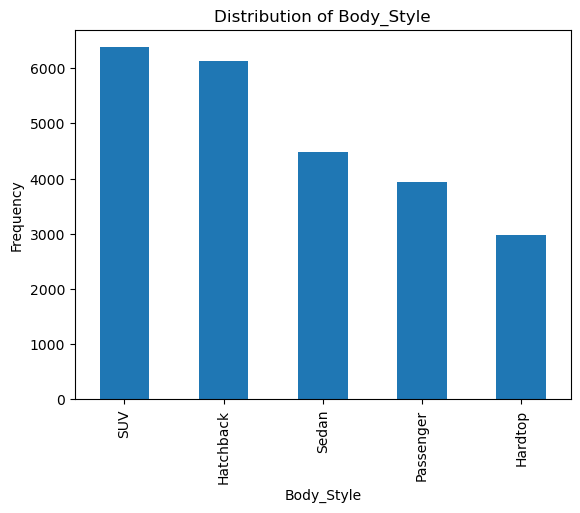

Train/Test Split Completed
Training set size: 19124
Test set size: 4782
Target distribution in training set:
Body_Style
SUV          0.266628
Hatchback    0.256327
Sedan        0.187722
Passenger    0.165028
Hardtop      0.124294
Name: proportion, dtype: float64
Target distribution in testing set:
Body_Style
SUV          0.266625
Hatchback    0.256378
Sedan        0.187788
Passenger    0.164994
Hardtop      0.124216
Name: proportion, dtype: float64


In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Explore the target variable
print("Distribution of Body_Style:")
print(df['Body_Style'].value_counts())

# Plot the distribution
df['Body_Style'].value_counts().plot(kind='bar', title="Distribution of Body_Style")
plt.xlabel("Body_Style")
plt.ylabel("Frequency")
plt.show()

# Features and target variable
X = df.drop(columns=['Body_Style'])
y = df['Body_Style']

# Perform stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Display the results
print("Train/Test Split Completed")
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print("Target distribution in training set:")
print(y_train.value_counts(normalize=True))
print("Target distribution in testing set:")
print(y_test.value_counts(normalize=True))


### y_profiling


Missing Values in the Dataset:
No missing values found.

Summary Statistics:
       Annual_Income         Price
count   2.390600e+04  23906.000000
mean    8.814008e+05  28090.247846
std     7.366320e+05  14788.687608
min     1.350000e+04   1200.000000
25%     4.540000e+05  18001.000000
50%     7.600000e+05  23000.000000
75%     1.225000e+06  34000.000000
max     1.120000e+07  85800.000000

Visualizing Distributions of the Numeric Features:


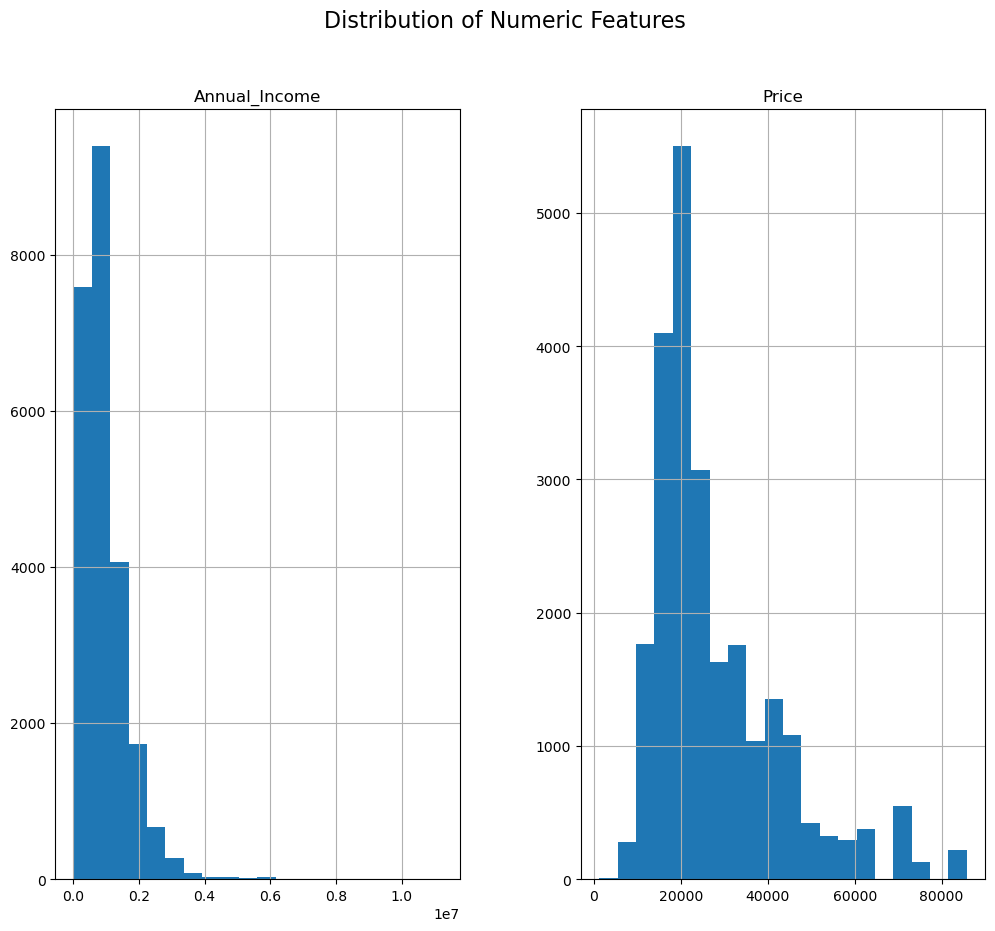


Visualizing Distributions of Categorical Features:


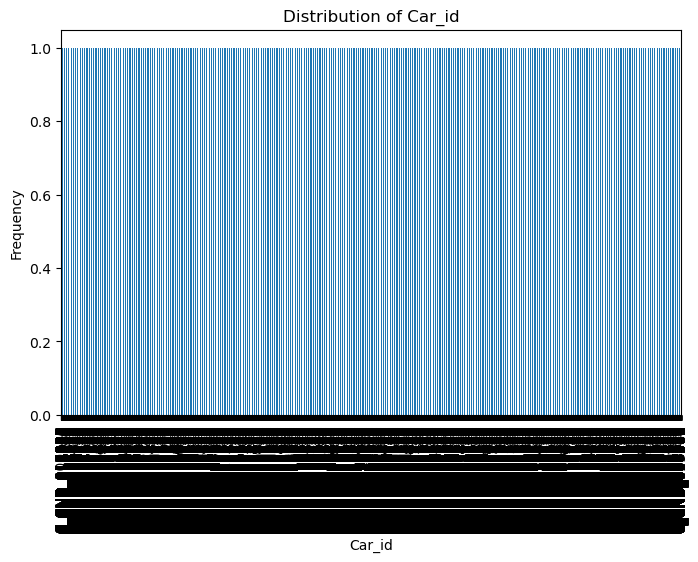

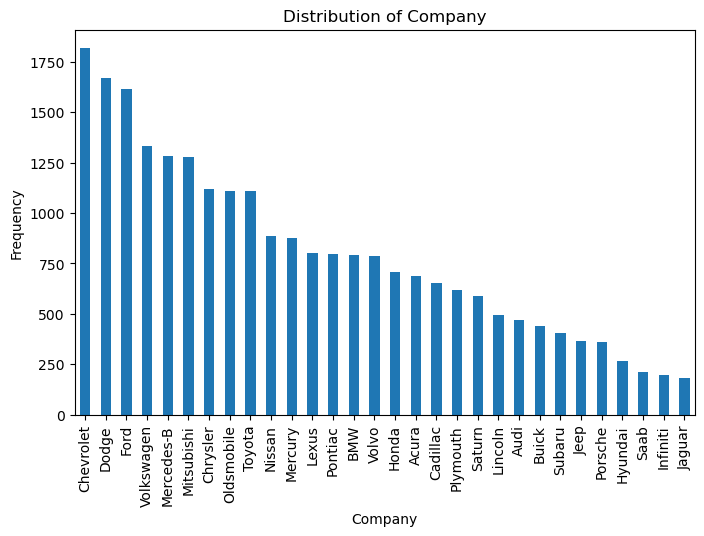

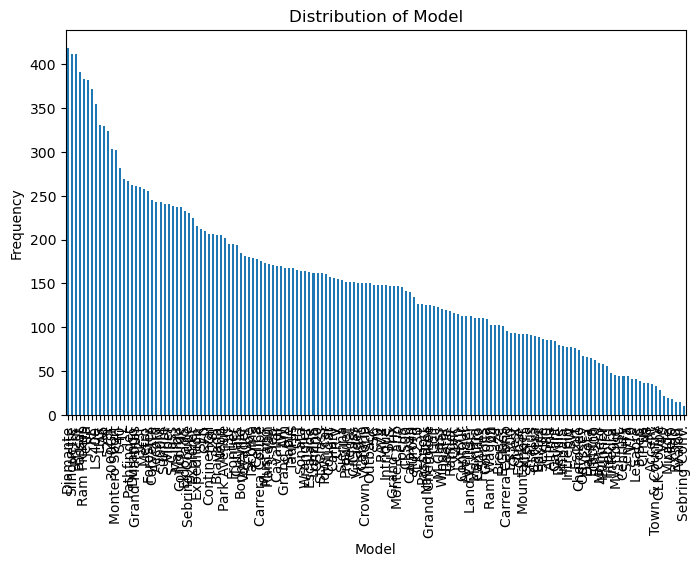

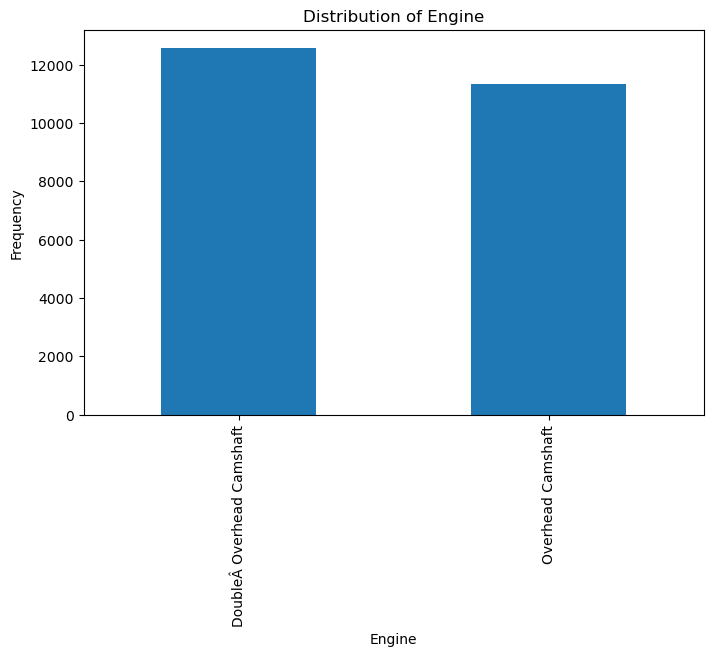

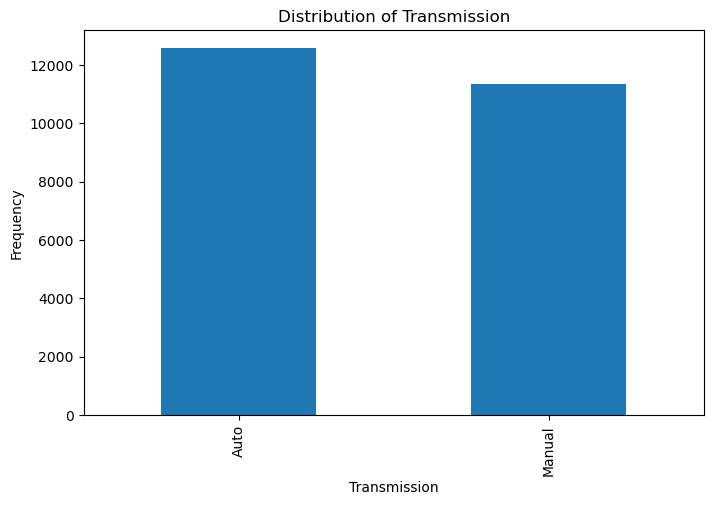

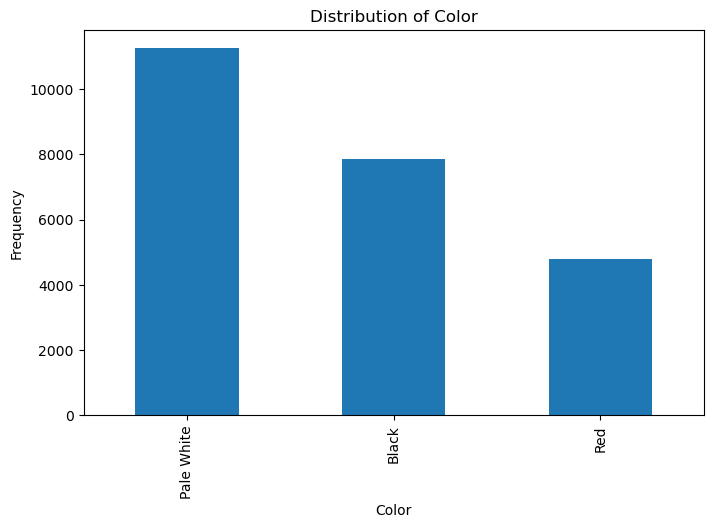

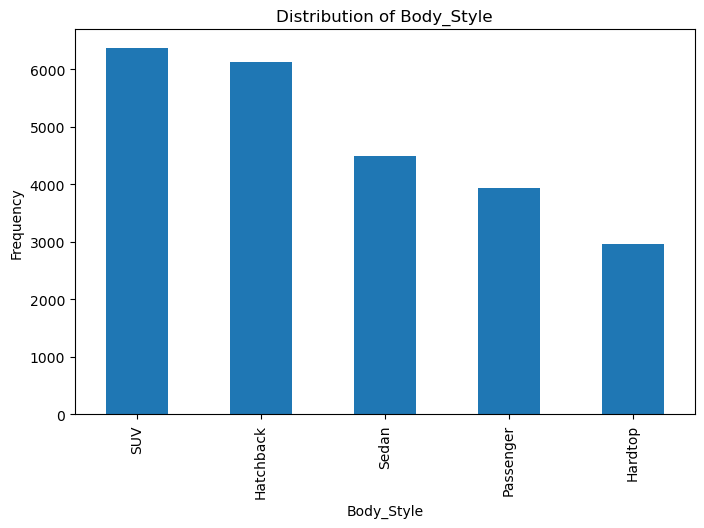

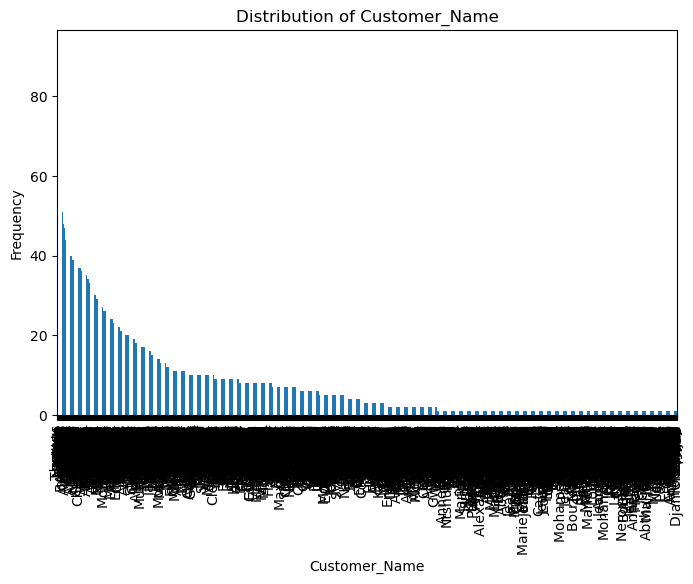

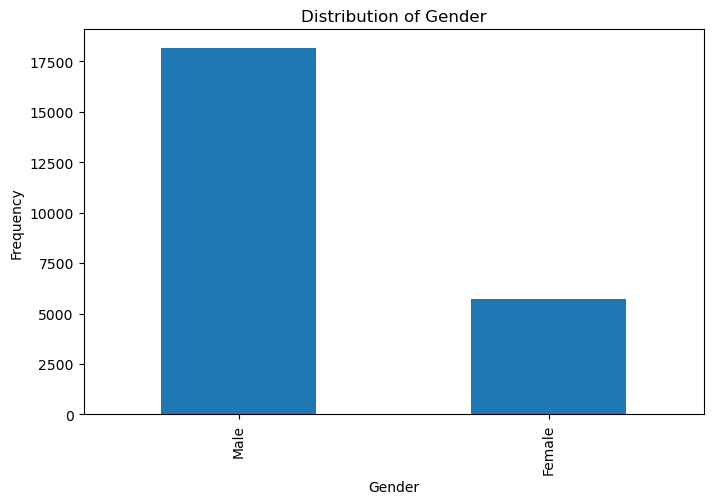

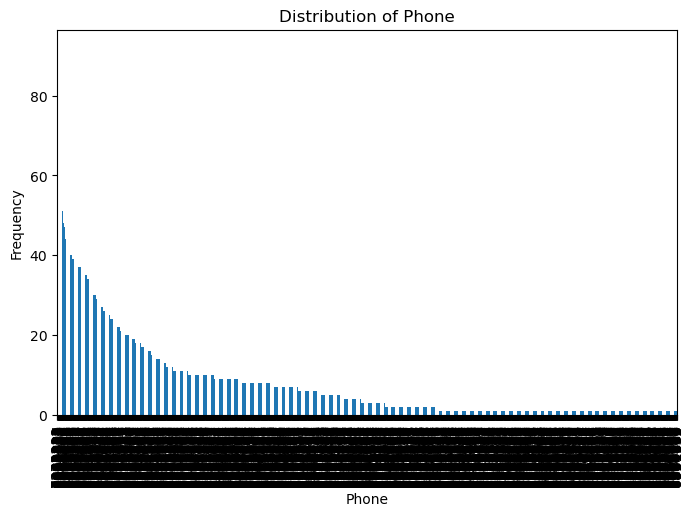

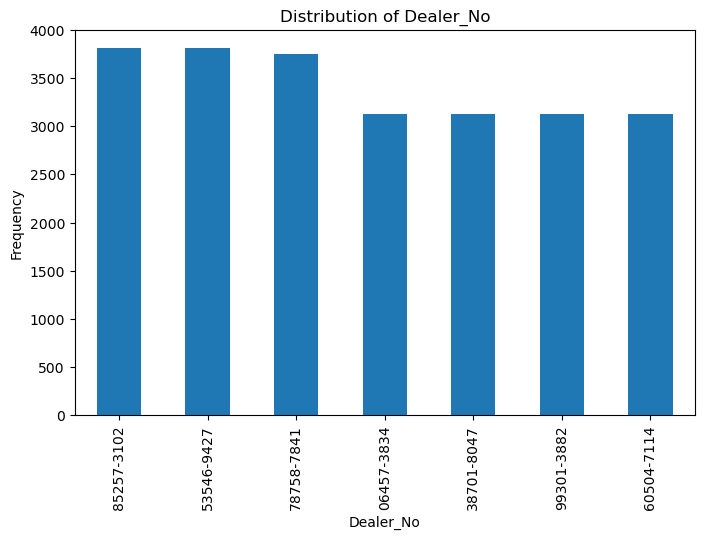

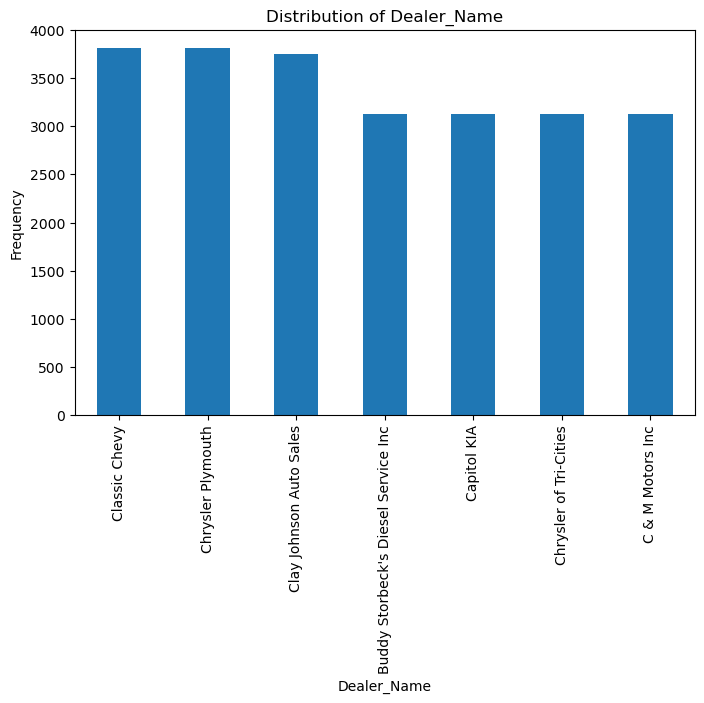

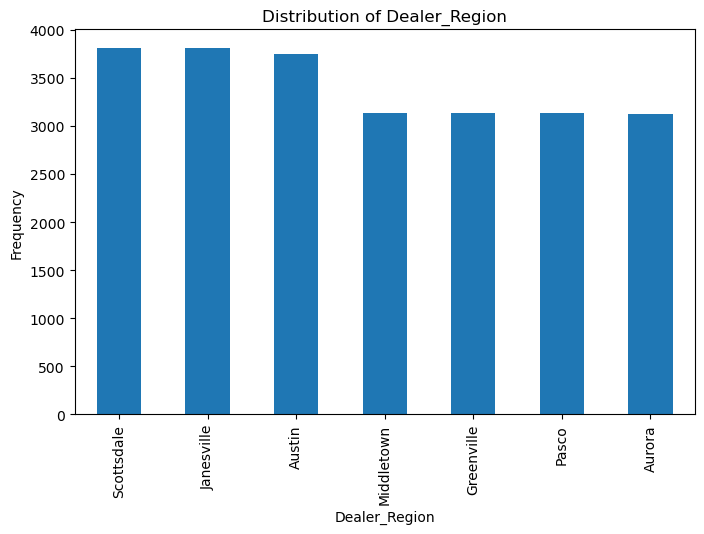

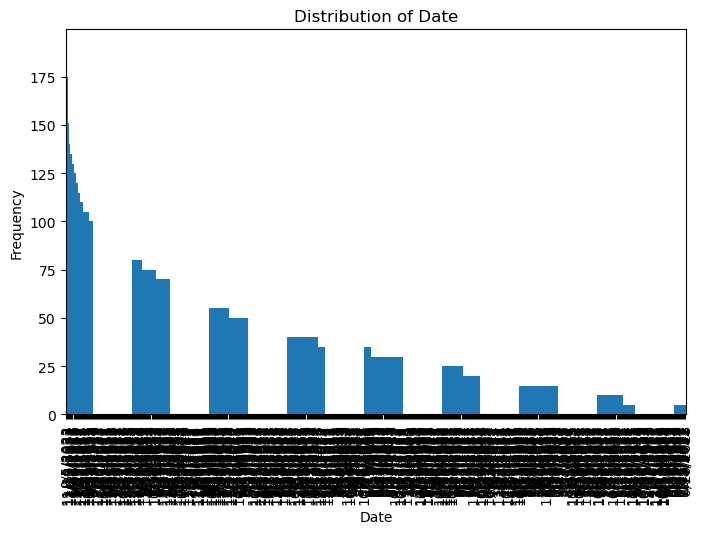


Correlation Matrix:


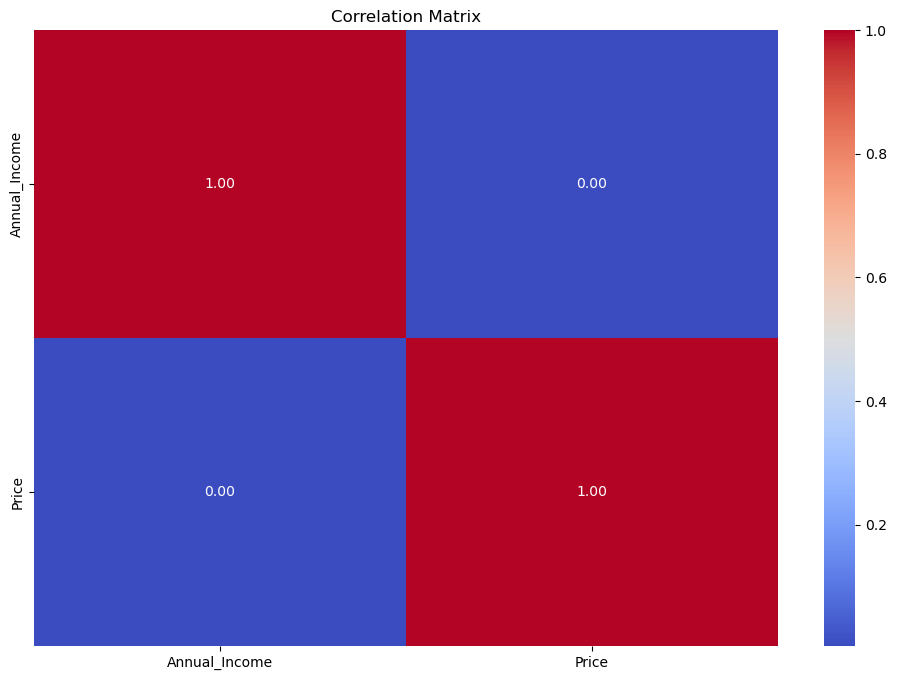


Observations:
- Check for missing values or handle them if necessar.
- Look for capped values or outliers in numeric features.
- Identify and address any skewness in the distribution of numeric features.
- Assess multicollinearity using the correlation matrix.

Data Cleanup Tasks:
1. Handle missing values in features.
2. Check and address outliers in numeric features.
3. Transform skewed distributions, if necessary.
4. Drop or combine highly correlated features to address multicollinearity.
5. Standardize or normalize numeric features for models sensitive to scale.


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("\nMissing Values in the Dataset:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.any() else "No missing values found.")

# Generate summary statistics for numeric features
print("\nSummary Statistics:")
print(df.describe())

# Visualize distributions of numeric features
print("\nVisualizing Distributions of the Numeric Features:")
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_features].hist(figsize=(12, 10), bins=20)
plt.suptitle("Distribution of Numeric Features", size=16)
plt.show()

# Visualize categorical distributions (if applicable)
print("\nVisualizing Distributions of Categorical Features:")
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Correlation Matrix Analysis
print("\nCorrelation Matrix:")
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Observations and Cleanup Task List
print("\nObservations:")
print("- Check for missing values or handle them if necessar.")
print("- Look for capped values or outliers in numeric features.")
print("- Identify and address any skewness in the distribution of numeric features.")
print("- Assess multicollinearity using the correlation matrix.")

print("\nData Cleanup Tasks:")
cleanup_tasks = [
    "Handle missing values in features.",
    "Check and address outliers in numeric features.",
    "Transform skewed distributions, if necessary.",
    "Drop or combine highly correlated features to address multicollinearity.",
    "Standardize or normalize numeric features for models sensitive to scale."
]
for i, task in enumerate(cleanup_tasks, 1):
    print(f"{i}. {task}")


### EXP 1

In [10]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import mlflow
import dagshub


Accessing as manogna145

Initialized MLflow to track repo "manogna145/my-first-repo"

Repository manogna145/my-first-repo initialized!

2024/12/19 19:57:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/12/19 19:57:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/12/19 19:57:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

🏃 View run carefree-worm-236 at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0/runs/14aab891258e4500a594518cab53940d
🧪 View experiment at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0
🏃 View run mysterious-elk-259 at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0/runs/41bdde1b82e64d26a91e3fd5c2b06a7b
🧪 View experiment at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0
🏃 View run incongruous-deer-828 at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0/runs/5e06a7972417430f850493c5aca945a2
🧪 View experiment at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0
🏃 View run debonair-stag-207 at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0/runs/c3cd588a8a0d42b5aac24e88c24bdf4c
🧪 View experiment at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0
🏃 View run skillful-crane-913 at: https://dagshub.com/manogna145/my-first-repo.m

2024/12/19 19:58:34 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException('Failed to perform one or more operations on the run with ID 3eea0061d584426c97c337fbee910a13. Failed operations: [RestException("INVALID_PARAMETER_VALUE: Response: {\'error_code\': \'INVALID_PARAMETER_VALUE\'}")]')]
2024/12/19 19:58:45 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException('Failed to perform one or more operations on the run with ID 3eea0061d584426c97c337fbee910a13. Failed operations: [RestException("INVALID_PARAMETER_VALUE: Response: {\'error_code\': \'INVALID_PARAMETER_VALUE\'}")]')]
2024/12/19 19:58:56 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failu

Confusion Matrix:
[[ 560   19    0   15    0]
 [  81 1131    0   14    0]
 [   0    0  789    0    0]
 [  62   14    0 1199    0]
 [   0    0    0    0  898]]

Classification Report:
              precision    recall  f1-score   support

     Hardtop       0.80      0.94      0.86       594
   Hatchback       0.97      0.92      0.95      1226
   Passenger       1.00      1.00      1.00       789
         SUV       0.98      0.94      0.96      1275
       Sedan       1.00      1.00      1.00       898

    accuracy                           0.96      4782
   macro avg       0.95      0.96      0.95      4782
weighted avg       0.96      0.96      0.96      4782

Test F1 Score: 0.9536050160285555
🏃 View run silent-pug-207 at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0/runs/3eea0061d584426c97c337fbee910a13
🧪 View experiment at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0


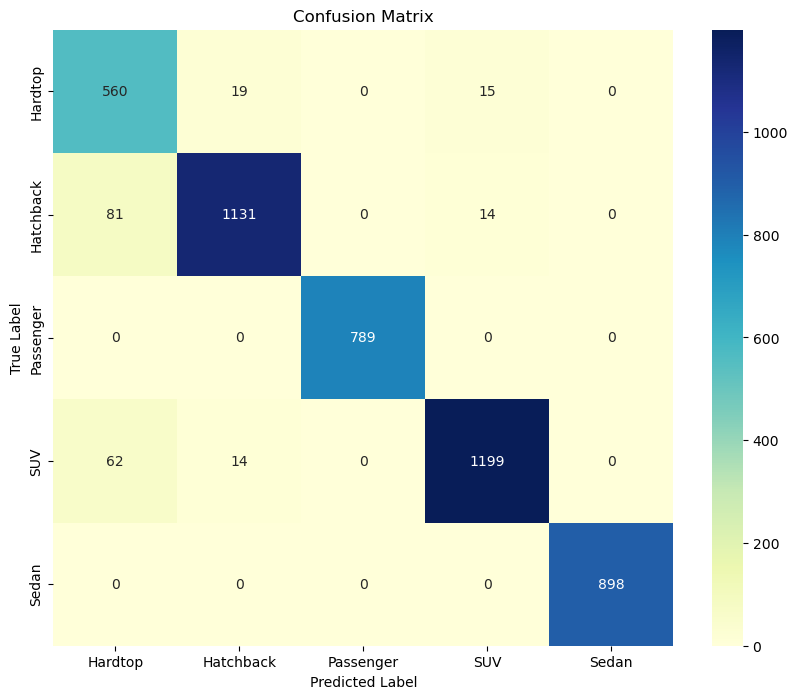

In [11]:

# Suppress warnings
warnings.filterwarnings("ignore")

# Initialize DagsHub connection for MLflow
dagshub.init(repo_owner='manogna145', repo_name='my-first-repo', mlflow=True)
mlflow.autolog()

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define preprocessing pipeline
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

log_transformer = Pipeline(steps=[
    ('log', FunctionTransformer(np.log1p, validate=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('log', log_transformer, numeric_features)
    ]
)

# Define the complete pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])

# Hyperparameter tuning
param_grid = {
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__solver': ['liblinear', 'lbfgs'],
    'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]
}

# Cross-validation and GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=2)

# Start MLflow logging
with mlflow.start_run():
    # Perform grid search
    grid_search.fit(X_train, y_train)
    
    # Log best parameters and results
    best_params = grid_search.best_params_
    mlflow.log_params(best_params)
    print("Best Parameters:", best_params)
    
    # Cross-validation results
    cv_results = cross_validate(grid_search.best_estimator_, X_train, y_train, cv=10, scoring='f1_macro', return_train_score=True)
    mean_f1 = np.mean(cv_results['test_score'])
    std_f1 = np.std(cv_results['test_score'])
    mlflow.log_metric('cv_mean_f1', mean_f1)
    mlflow.log_metric('cv_std_f1', std_f1)
    
    # Evaluate on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    mlflow.log_metric('test_f1', f1)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Classification Report
    class_report = classification_report(y_test, y_pred, output_dict=True)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Log class-wise metrics in MLflow
    for label, metrics in class_report.items():
        if isinstance(metrics, dict):  # Skip accuracy (it's a single value, not a dict)
            mlflow.log_metric(f'{label}_precision', metrics['precision'])
            mlflow.log_metric(f'{label}_recall', metrics['recall'])
            mlflow.log_metric(f'{label}_f1-score', metrics['f1-score'])
    
    # Save and log the confusion matrix as an artifact
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    
    print(f"Test F1 Score: {f1}")


### EXP 2

Initialized MLflow to track repo "manogna145/my-first-repo"

Repository manogna145/my-first-repo initialized!

2024/12/19 20:00:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/12/19 20:00:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/12/19 20:00:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.



LogisticRegression Classification Report:
              precision    recall  f1-score   support

     Hardtop       0.77      0.96      0.85       594
   Hatchback       0.98      0.92      0.95      1226
   Passenger       1.00      1.00      1.00       789
         SUV       0.98      0.93      0.95      1275
       Sedan       1.00      1.00      1.00       898

    accuracy                           0.95      4782
   macro avg       0.95      0.96      0.95      4782
weighted avg       0.96      0.95      0.96      4782

🏃 View run LogisticRegression at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0/runs/3a8380ade2eb4edbbefe0fffe86c5f90
🧪 View experiment at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0
[CV] END classifier__C=0.1, classifier__solver=liblinear, preprocessor__num__scaler=StandardScaler(); total time=   0.6s
[CV] END classifier__C=0.1, classifier__solver=lbfgs, preprocessor__num__scaler=MinMaxScaler(); total time=   6.5s
[C

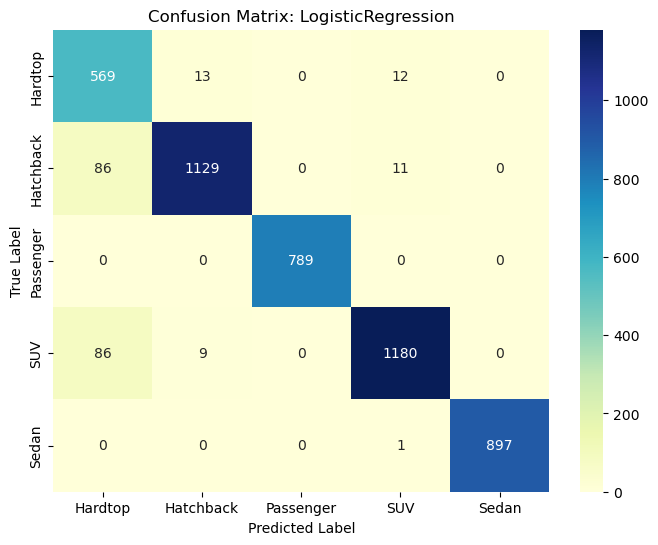

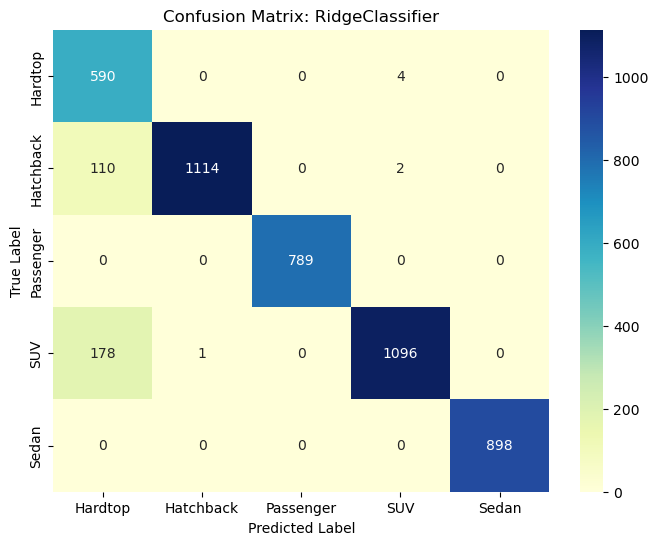

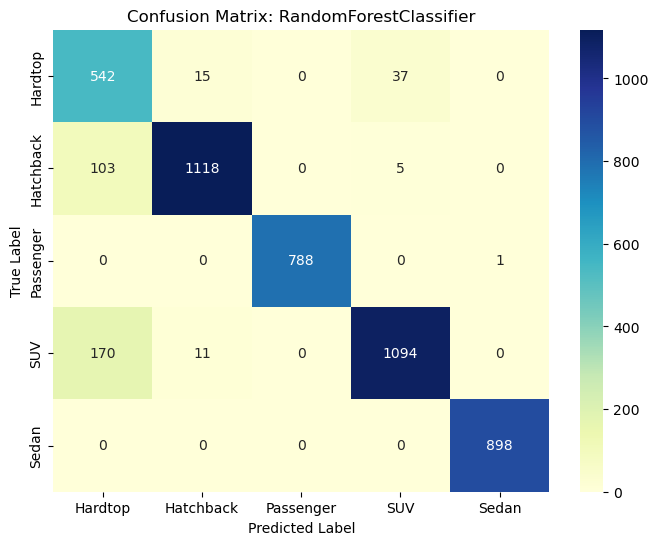

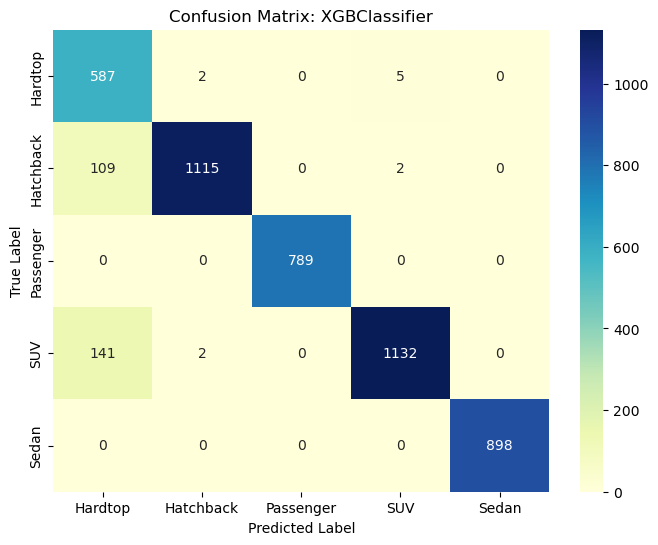

In [13]:

# Suppress warnings
warnings.filterwarnings("ignore")

# Initialize DagsHub connection for MLflow
dagshub.init(repo_owner='manogna145', repo_name='my-first-repo', mlflow=True)
mlflow.autolog()

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Transform target into numerical labels

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Define preprocessing pipeline
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object"]).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define classifiers to evaluate
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=42),
    'RidgeClassifier': RidgeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Iterate through classifiers and evaluate them
results = []

for name, model in classifiers.items():
    with mlflow.start_run(run_name=name):
        # Create a pipeline for the current model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        
        # Cross-validation
        cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring='f1_macro', return_train_score=True)
        mean_f1 = np.mean(cv_results['test_score'])
        std_f1 = np.std(cv_results['test_score'])
        mlflow.log_metric('cv_mean_f1', mean_f1)
        mlflow.log_metric('cv_std_f1', std_f1)
        
        # Train the model on the full training set
        pipeline.fit(X_train, y_train)
        
        # Evaluate on the test set
        y_pred = pipeline.predict(X_test)
        test_f1 = f1_score(y_test, y_pred, average='macro')
        mlflow.log_metric('test_f1', test_f1)
        
        # Log confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.title(f"Confusion Matrix: {name}")
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        conf_matrix_file = f"confusion_matrix_{name}.png"
        plt.savefig(conf_matrix_file)
        mlflow.log_artifact(conf_matrix_file)
        
        # Log classification report
        class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
        print(f"\n{name} Classification Report:")
        print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
        for label, metrics in class_report.items():
            if isinstance(metrics, dict):
                mlflow.log_metric(f'{label}_precision', metrics['precision'])
                mlflow.log_metric(f'{label}_recall', metrics['recall'])
                mlflow.log_metric(f'{label}_f1-score', metrics['f1-score'])
        
        # Store results
        results.append({
            'Model': name,
            'CV Mean F1': mean_f1,
            'CV Std F1': std_f1,
            'Test F1': test_f1
        })

# Summarize results
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)


### EXP 3

Initialized MLflow to track repo "manogna145/my-first-repo"

Repository manogna145/my-first-repo initialized!

2024/12/19 20:08:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/12/19 20:08:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/12/19 20:08:21 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.



Classification Report:
              precision    recall  f1-score   support

     Hardtop       0.23      0.07      0.11       594
   Hatchback       0.35      0.44      0.39      1226
   Passenger       0.28      0.17      0.21       789
         SUV       0.33      0.46      0.39      1275
       Sedan       0.34      0.31      0.32       898

    accuracy                           0.33      4782
   macro avg       0.30      0.29      0.28      4782
weighted avg       0.32      0.33      0.31      4782

🏃 View run Feature Engineering with XGBClassifier at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0/runs/5bd150b25aa746b5a4fe6e54bf95184a
🧪 View experiment at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0


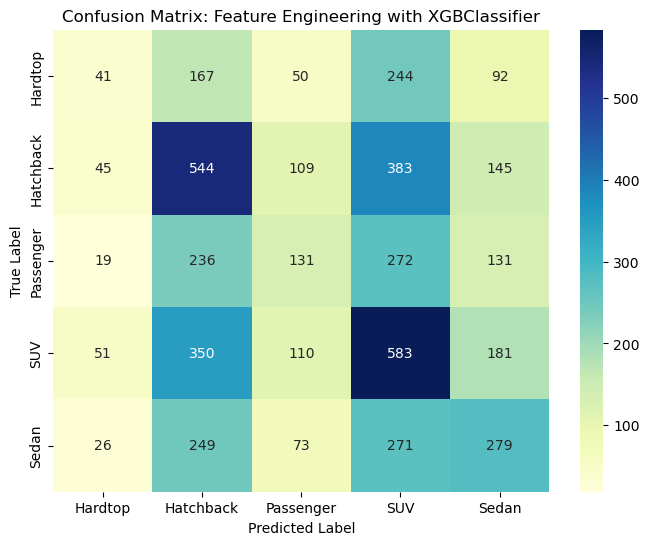

In [15]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import mlflow
import dagshub

# Suppress warnings
warnings.filterwarnings("ignore")

# Initialize DagsHub connection for MLflow
dagshub.init(repo_owner='manogna145', repo_name='my-first-repo', mlflow=True)
mlflow.autolog()

# Step 1: Feature Engineering
def feature_engineering(df):
    """Applies feature engineering to the dataset."""
    df = df.copy()
    
    # Combine numerical attributes
    df['Price_to_Income_Ratio'] = df['Price'] / (df['Annual_Income'] + 1)
    
    # Combine categorical attributes (if available)
    if 'Body_Style' in df.columns and 'Transmission' in df.columns:
        df['BodyStyle_Transmission'] = df['Body_Style'] + "_" + df['Transmission']
    
    # Log-transform skewed numeric features
    df['Log_Annual_Income'] = np.log1p(df['Annual_Income'])
    
    return df

# Apply feature engineering
X_fe = feature_engineering(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_fe, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Step 2: Preprocessing Pipeline
# Define numeric and categorical features after feature engineering
numeric_features = ['Annual_Income', 'Price', 'Price_to_Income_Ratio', 'Log_Annual_Income']
categorical_features = ['BodyStyle_Transmission'] if 'BodyStyle_Transmission' in X_train.columns else []

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Step 3: Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Step 4: Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Step 5: Cross-validation and Training
with mlflow.start_run(run_name="Feature Engineering with XGBClassifier"):
    # Cross-validation
    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring='f1_macro', return_train_score=True)
    mean_f1 = np.mean(cv_results['test_score'])
    std_f1 = np.std(cv_results['test_score'])
    mlflow.log_metric('cv_mean_f1', mean_f1)
    mlflow.log_metric('cv_std_f1', std_f1)

    # Train the model on the full training set
    pipeline.fit(X_train, y_train)

    # Evaluate on the test set
    y_pred = pipeline.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='macro')
    mlflow.log_metric('test_f1', test_f1)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix: Feature Engineering with XGBClassifier")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    conf_matrix_file = "confusion_matrix_feature_engineering.png"
    plt.savefig(conf_matrix_file)
    mlflow.log_artifact(conf_matrix_file)

    # Log classification report
    class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    for label, metrics in class_report.items():
        if isinstance(metrics, dict):
            mlflow.log_metric(f'{label}_precision', metrics['precision'])
            mlflow.log_metric(f'{label}_recall', metrics['recall'])
            mlflow.log_metric(f'{label}_f1-score', metrics['f1-score'])


### EXP 4

Initialized MLflow to track repo "manogna145/my-first-repo"

Repository manogna145/my-first-repo initialized!

2024/12/19 20:09:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/12/19 20:09:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/12/19 20:09:04 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/12/19 20:09:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'dae81d5b8384489193604ba8ece0eb16', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


🏃 View run mercurial-mink-467 at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0/runs/dae81d5b8384489193604ba8ece0eb16
🧪 View experiment at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0
🏃 View run Feature Selection with XGBClassifier at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0/runs/9a988075726d49abad77ef26f8db4e14
🧪 View experiment at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0


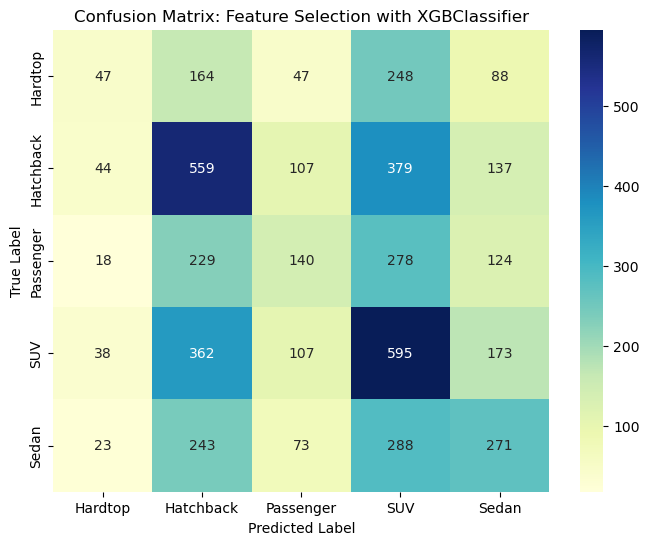

In [17]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import mlflow
import dagshub

# Suppress warnings
warnings.filterwarnings("ignore")

# Initialize DagsHub connection for MLflow
dagshub.init(repo_owner='manogna145', repo_name='my-first-repo', mlflow=True)
mlflow.autolog()

# Step 1: Correlation Threshold
def select_by_correlation(data, threshold=0.9):
    """Removes highly correlated features."""
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    corr_matrix = numeric_data.corr()
    upper_triangle = np.triu(corr_matrix, k=1)  # Extract upper triangle
    
    # Identify highly correlated columns
    highly_correlated = [
        corr_matrix.columns[i] for i in range(len(corr_matrix.columns))
        if any(abs(corr_matrix.iloc[j, i]) > threshold for j in range(i))
    ]
    
    return data.drop(columns=highly_correlated, errors='ignore'), highly_correlated

# Step 2: Feature Importance
def select_by_importance(X, y, model, top_n=10):
    """Selects top-n features based on feature importance."""
    model.fit(X, y)
    importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    selected_features = importance.head(top_n)['Feature'].tolist()
    return X[selected_features], importance

# Step 3: Variance Threshold
def select_by_variance(data, threshold=0.01):
    """Removes low-variance features."""
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    retained_features = data.columns[selector.get_support()]
    return data[retained_features], retained_features

# Step 4: Apply Feature Selection
def feature_selection_pipeline(X, y):
    """Applies all three feature selection methods."""
    results = {}
    
    # Correlation Threshold
    X_corr, dropped_corr = select_by_correlation(X, threshold=0.9)
    results['Dropped Correlation'] = dropped_corr
    
    # Feature Importance (RandomForest)
    X_imp, importance = select_by_importance(X_corr, y, RandomForestClassifier(random_state=42), top_n=10)
    results['Feature Importance'] = importance
    
    # Variance Threshold
    X_var, retained_var = select_by_variance(X_imp, threshold=0.01)
    results['Retained Variance Features'] = retained_var.tolist()
    
    return X_var, results

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply Feature Engineering and Selection
X_numeric = X.select_dtypes(include=[np.number])  # Select only numeric features for feature selection
X_selected, selection_results = feature_selection_pipeline(X_numeric, y_encoded)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Step 5: Model and Pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X_train.columns)
    ]
)

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Step 6: Cross-validation and Logging
with mlflow.start_run(run_name="Feature Selection with XGBClassifier"):
    # Cross-validation
    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring='f1_macro', return_train_score=True)
    mean_f1 = np.mean(cv_results['test_score'])
    std_f1 = np.std(cv_results['test_score'])
    mlflow.log_metric('cv_mean_f1', mean_f1)
    mlflow.log_metric('cv_std_f1', std_f1)

    # Train the model on the full training set
    pipeline.fit(X_train, y_train)

    # Evaluate on the test set
    y_pred = pipeline.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='macro')
    mlflow.log_metric('test_f1', test_f1)

    # Log confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix: Feature Selection with XGBClassifier")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    conf_matrix_file = "confusion_matrix_feature_selection.png"
    plt.savefig(conf_matrix_file)


### EXP 5

Initialized MLflow to track repo "manogna145/my-first-repo"

Repository manogna145/my-first-repo initialized!

2024/12/19 20:09:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/12/19 20:09:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/12/19 20:09:41 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2024/12/19 20:09:42 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '342c432d4bf0489db4730ee61ed7c082', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/19 20:09:46 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/12/19 20:09:46 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


🏃 View run painted-conch-615 at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0/runs/342c432d4bf0489db4730ee61ed7c082
🧪 View experiment at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0


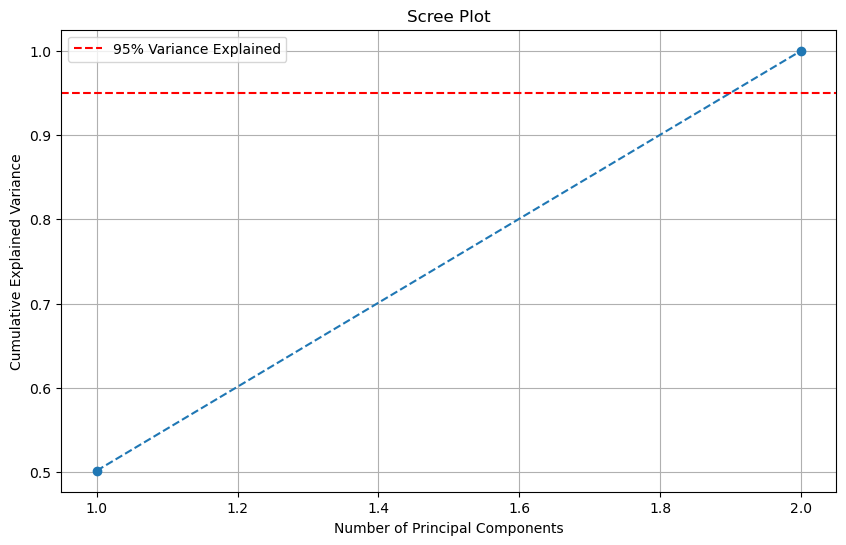

Number of components to retain 95% variance: 2


2024/12/19 20:09:55 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '655a376f49494553ac3b615cc63963cd', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/12/19 20:09:59 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/12/19 20:09:59 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


🏃 View run melodic-ant-101 at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0/runs/655a376f49494553ac3b615cc63963cd
🧪 View experiment at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0

Classification Report:
              precision    recall  f1-score   support

     Hardtop       0.15      0.04      0.06       594
   Hatchback       0.30      0.41      0.35      1226
   Passenger       0.27      0.12      0.17       789
         SUV       0.31      0.46      0.37      1275
       Sedan       0.28      0.21      0.24       898

    accuracy                           0.29      4782
   macro avg       0.26      0.25      0.24      4782
weighted avg       0.27      0.29      0.27      4782

🏃 View run PCA Dimensionality Reduction with XGBClassifier at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0/runs/76cac5d6dd4441b7b24a737c611a057c
🧪 View experiment at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0


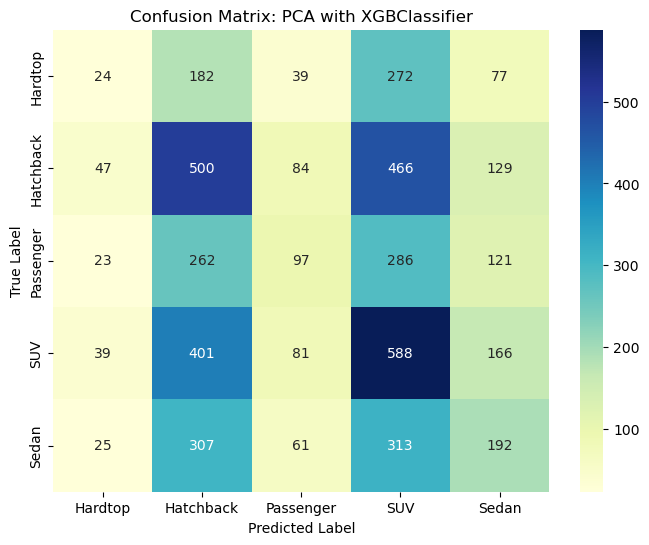

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import mlflow
import dagshub

# Initialize DagsHub connection for MLflow
dagshub.init(repo_owner='manogna145', repo_name='my-first-repo', mlflow=True)
mlflow.autolog()

# Step 1: Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))

# Step 3: PCA for Dimensionality Reduction
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree Plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Explained')
plt.legend()
plt.grid()
scree_plot_file = "scree_plot.png"
plt.savefig(scree_plot_file)
plt.show()

# Step 4: Select number of components to retain 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

# Transform the data with the selected components
pca = PCA(n_components=n_components)
X_pca_selected = pca.fit_transform(X_scaled)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca_selected, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Step 6: Model and Pipeline
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

pipeline = Pipeline(steps=[
    ('classifier', model)
])

# Step 7: Cross-validation and Logging
with mlflow.start_run(run_name="PCA Dimensionality Reduction with XGBClassifier"):
    # Cross-validation
    cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring='f1_macro', return_train_score=True)
    mean_f1 = np.mean(cv_results['test_score'])
    std_f1 = np.std(cv_results['test_score'])
    mlflow.log_metric('cv_mean_f1', mean_f1)
    mlflow.log_metric('cv_std_f1', std_f1)

    # Train the model on the full training set
    pipeline.fit(X_train, y_train)

    # Evaluate on the test set
    y_pred = pipeline.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='macro')
    mlflow.log_metric('test_f1', test_f1)

    # Log confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix: PCA with XGBClassifier")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    conf_matrix_file = "confusion_matrix_pca.png"
    plt.savefig(conf_matrix_file)
    mlflow.log_artifact(conf_matrix_file)

    # Log classification report
    class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    for label, metrics in class_report.items():
        if isinstance(metrics, dict):
            mlflow.log_metric(f'{label}_precision', metrics['precision'])
            mlflow.log_metric(f'{label}_recall', metrics['recall'])
            mlflow.log_metric(f'{label}_f1-score', metrics['f1-score'])

    # Log PCA results
    mlflow.log_metric('n_components', n_components)
    mlflow.log_artifact(scree_plot_file)


### EXP 6

In [79]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import dagshub
import os

# Initialize DagsHub connection for MLflow
dagshub.init(repo_owner='manogna145', repo_name='my-first-repo', mlflow=True)

# Set the experiment name
mlflow.set_experiment("Manogna_projects")

# Ensure temporary files are saved in a controlled manner
os.makedirs("artifacts", exist_ok=True)

# Step 1: Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Step 3: Preprocessing
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Step 4: Experiment - Test Four Different Classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42, n_estimators=100),
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=42),
    'RidgeClassifier': RidgeClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

# Loop through classifiers
for name, classifier in classifiers.items():
    with mlflow.start_run(run_name=f"Custom Experiment: {name}"):
        # Define the pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', classifier)
        ])

        # Cross-validation to calculate mean F1-score
        cv_f1_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_macro')
        mean_f1 = np.mean(cv_f1_scores)
        std_f1 = np.std(cv_f1_scores)
        mlflow.log_metric('cv_mean_f1', mean_f1)
        mlflow.log_metric('cv_std_f1', std_f1)

        # Train the model on the full training set
        pipeline.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = pipeline.predict(X_test)
        test_f1 = f1_score(y_test, y_pred, average='macro')
        mlflow.log_metric('test_f1', test_f1)

        # Log confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.title(f"Confusion Matrix: {name}")
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        conf_matrix_file = f"artifacts/confusion_matrix_{name.lower()}.png"
        plt.savefig(conf_matrix_file)
        mlflow.log_artifact(conf_matrix_file)
        plt.close()

        # Log classification report
        class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
        print(f"\nClassification Report for {name}:")
        print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
        for label, metrics in class_report.items():
            if isinstance(metrics, dict):
                mlflow.log_metric(f'{label}_precision', metrics['precision'])
                mlflow.log_metric(f'{label}_recall', metrics['recall'])
                mlflow.log_metric(f'{label}_f1-score', metrics['f1-score'])


Initialized MLflow to track repo "manogna145/my-first-repo"

Repository manogna145/my-first-repo initialized!


Classification Report for RandomForest:
              precision    recall  f1-score   support

     Hardtop       0.67      0.91      0.77       594
   Hatchback       0.98      0.91      0.94      1226
   Passenger       1.00      1.00      1.00       789
         SUV       0.96      0.86      0.91      1275
       Sedan       1.00      1.00      1.00       898

    accuracy                           0.93      4782
   macro avg       0.92      0.94      0.92      4782
weighted avg       0.94      0.93      0.93      4782

🏃 View run Custom Experiment: RandomForest at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0/runs/80c030effc894ac0a2327a92360e4527
🧪 View experiment at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/0

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

     Hardtop       0.77      0.96      0.85       594
   Hatchback       0.98      0.92      0.95      1226
   Passenger     

In [22]:
### EXP 7

In [81]:
import mlflow

# Set the experiment name
experiment_name = "Custom Experiment #7"

# Create or set the experiment
mlflow.set_experiment(experiment_name)

print(f"Experiment '{experiment_name}' is set!")


Experiment 'Custom Experiment #7' is set!



Classification Report for RandomForest:
              precision    recall  f1-score   support

     Hardtop       0.67      0.91      0.77       594
   Hatchback       0.98      0.91      0.94      1226
   Passenger       1.00      1.00      1.00       789
         SUV       0.96      0.86      0.91      1275
       Sedan       1.00      1.00      1.00       898

    accuracy                           0.93      4782
   macro avg       0.92      0.94      0.92      4782
weighted avg       0.94      0.93      0.93      4782

🏃 View run Experiment #7: RandomForest at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/1/runs/d63430d0befb4148a16bd80df76fbae6
🧪 View experiment at: https://dagshub.com/manogna145/my-first-repo.mlflow/#/experiments/1

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

     Hardtop       0.77      0.96      0.85       594
   Hatchback       0.98      0.92      0.95      1226
   Passenger       1.

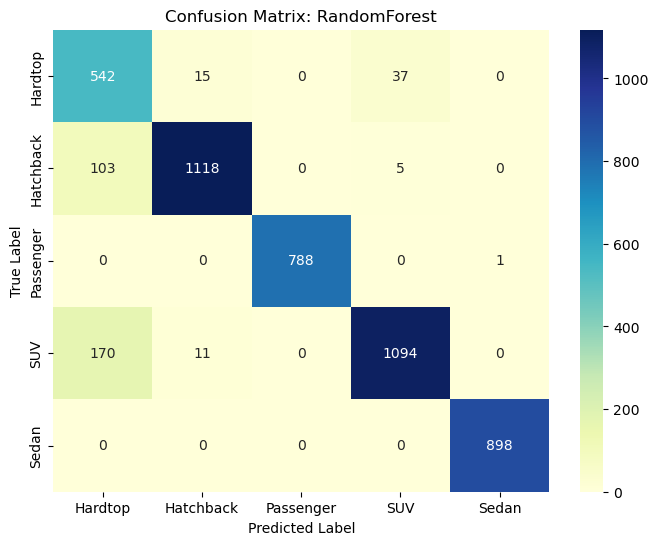

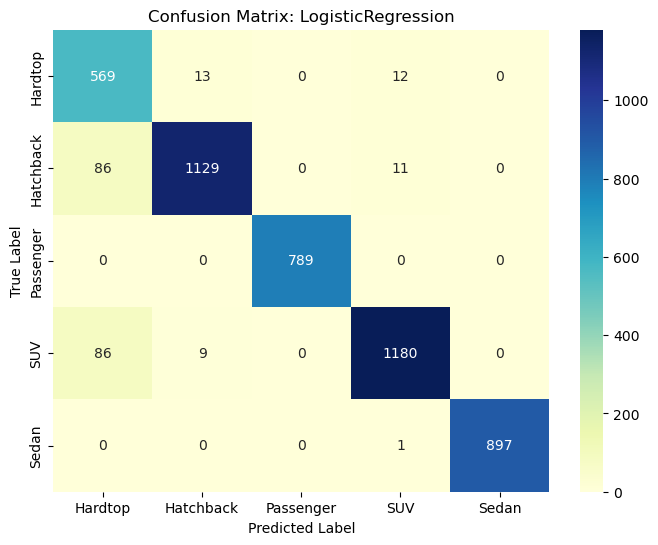

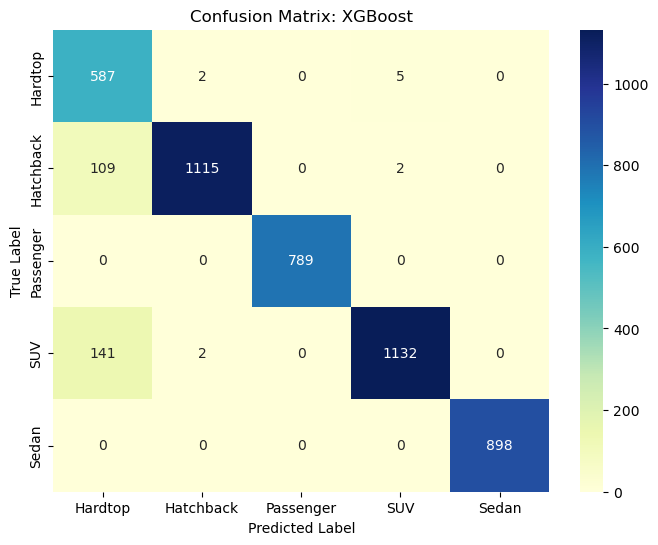

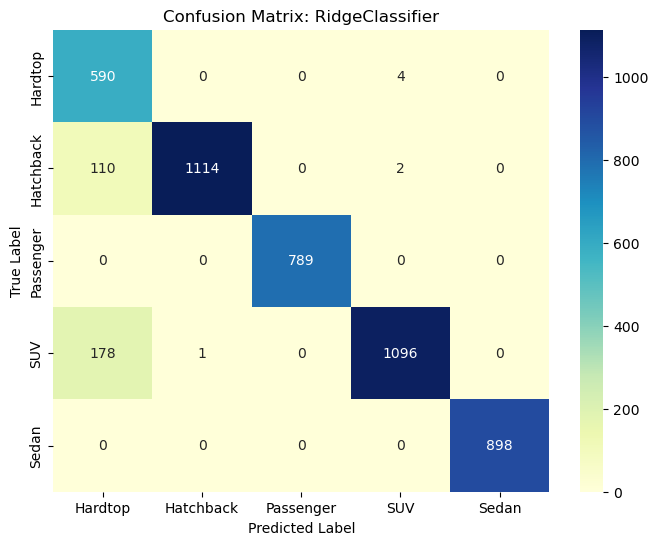

In [47]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow

# Set or create a new experiment in MLflow
experiment_name = "Custom Experiment #7"
mlflow.set_experiment(experiment_name)

# Initialize LabelEncoder for the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Preprocessing pipeline for numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define classifiers for the experiment
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42, n_estimators=100),
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'RidgeClassifier': RidgeClassifier(random_state=42)
}

# Loop through classifiers and log results in MLflow
for name, classifier in classifiers.items():
    with mlflow.start_run(run_name=f"Experiment #7: {name}"):
        # Define the pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', classifier)
        ])

        # Perform cross-validation
        cv_results = cross_validate(pipeline, X_train, y_train, cv=5, scoring='f1_macro', return_train_score=True)
        mean_f1 = np.mean(cv_results['test_score'])
        std_f1 = np.std(cv_results['test_score'])
        mlflow.log_metric('cv_mean_f1', mean_f1)
        mlflow.log_metric('cv_std_f1', std_f1)

        # Train the model on the full training set
        pipeline.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = pipeline.predict(X_test)
        test_f1 = f1_score(y_test, y_pred, average='macro')
        mlflow.log_metric('test_f1', test_f1)

        # Log confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.title(f"Confusion Matrix: {name}")
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        conf_matrix_file = f"confusion_matrix_{name.lower()}.png"
        plt.savefig(conf_matrix_file)
        mlflow.log_artifact(conf_matrix_file)

        # Log classification report
        class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
        print(f"\nClassification Report for {name}:")
        print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
        for label, metrics in class_report.items():
            if isinstance(metrics, dict):
                mlflow.log_metric(f'{label}_precision', metrics['precision'])
                mlflow.log_metric(f'{label}_recall', metrics['recall'])
                mlflow.log_metric(f'{label}_f1-score', metrics['f1-score'])

print(f"Experiment '{experiment_name}' completed. Check the MLflow UI for results.")


### F1

Run ID: c65a1f97843040d8877cbc503e0b1ab8, Metrics: {'SUV_precision': 0.9945553539019963, 'Passenger_f1-score': 1.0, 'macro avg_recall': 0.9523039679331783, 'weighted avg_f1-score': 0.9422328041459841, 'Hardtop_f1-score': 0.8016304347826086, 'Hardtop_recall': 0.9932659932659933, 'Hardtop_precision': 0.6719817767653758, 'Passenger_recall': 1.0, 'macro avg_f1-score': 0.9351062536436453, 'macro avg_precision': 0.933128053936165, 'cv_mean_f1': 0.930842830538799, 'SUV_recall': 0.8596078431372549, 'weighted avg_precision': 0.957573337527012, 'cv_std_f1': 0.003324039896075919, 'Sedan_precision': 1.0, 'Hatchback_precision': 0.9991031390134529, 'training_precision_score': 1.0, 'training_recall_score': 1.0, 'training_f1_score': 1.0, 'training_accuracy_score': 1.0, 'training_score': 1.0, 'f1_score_X_test': 0.9351062536436453, 'Hatchback_f1-score': 0.9517300299017514, 'Sedan_recall': 1.0, 'weighted avg_recall': 0.938310330405688, 'Passenger_precision': 1.0, 'Sedan_f1-score': 1.0, 'SUV_f1-score': 0.

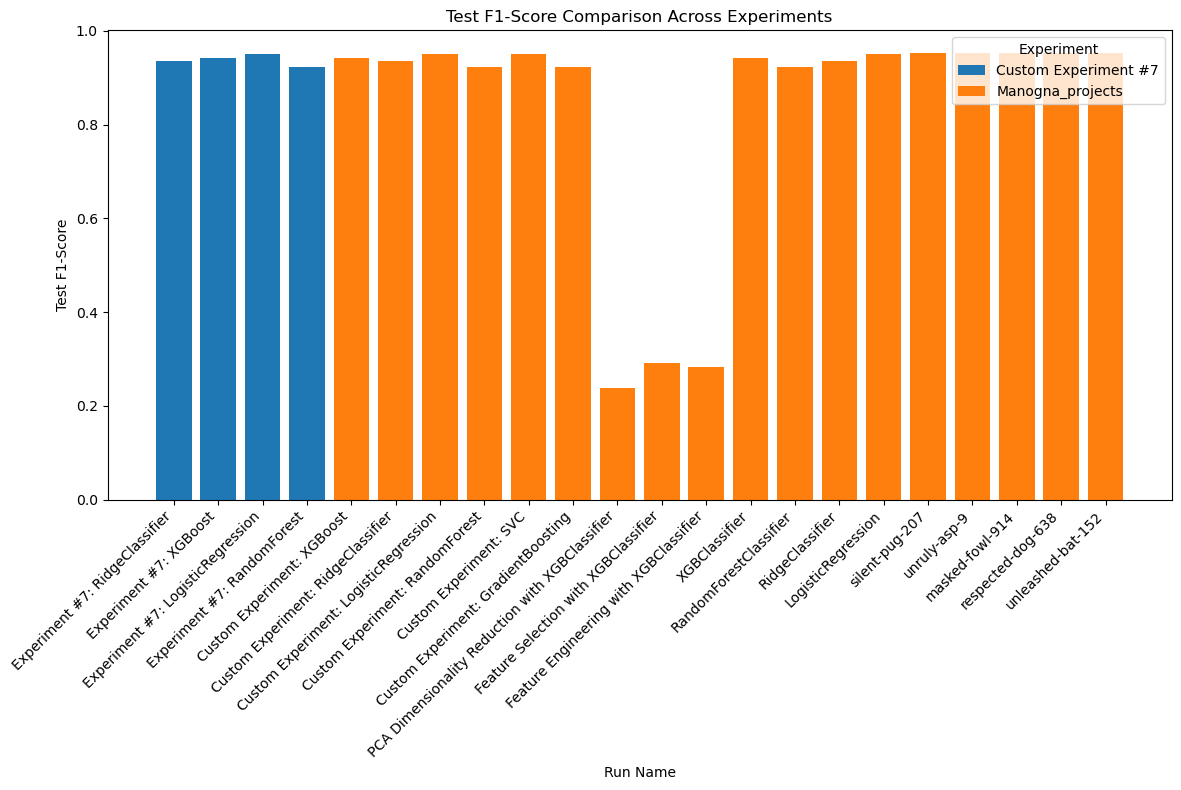

Best Model: silent-pug-207 in Experiment Manogna_projects with Test F1-Score: 0.954
Run ID: c65a1f97843040d8877cbc503e0b1ab8, Metrics: {'SUV_precision': 0.9945553539019963, 'Passenger_f1-score': 1.0, 'macro avg_recall': 0.9523039679331783, 'weighted avg_f1-score': 0.9422328041459841, 'Hardtop_f1-score': 0.8016304347826086, 'Hardtop_recall': 0.9932659932659933, 'Hardtop_precision': 0.6719817767653758, 'Passenger_recall': 1.0, 'macro avg_f1-score': 0.9351062536436453, 'macro avg_precision': 0.933128053936165, 'cv_mean_f1': 0.930842830538799, 'SUV_recall': 0.8596078431372549, 'weighted avg_precision': 0.957573337527012, 'cv_std_f1': 0.003324039896075919, 'Sedan_precision': 1.0, 'Hatchback_precision': 0.9991031390134529, 'training_precision_score': 1.0, 'training_recall_score': 1.0, 'training_f1_score': 1.0, 'training_accuracy_score': 1.0, 'training_score': 1.0, 'f1_score_X_test': 0.9351062536436453, 'Hatchback_f1-score': 0.9517300299017514, 'Sedan_recall': 1.0, 'weighted avg_recall': 0.93

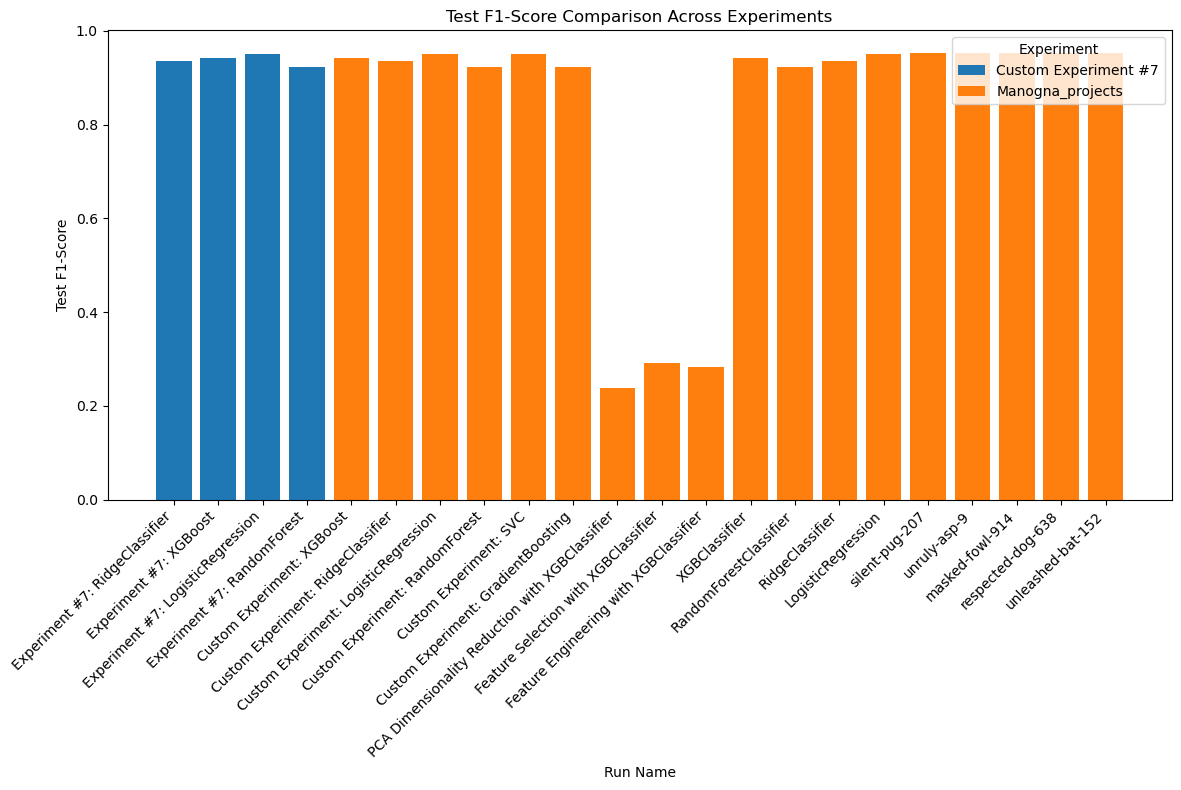

Best Model: silent-pug-207 in Experiment Manogna_projects with Test F1-Score: 0.954


In [93]:
import os
import mlflow
from mlflow.tracking import MlflowClient
import pandas as pd
import matplotlib.pyplot as plt

# Set your DagsHub tracking URI
mlflow.set_tracking_uri("https://dagshub.com/manogna145/my-first-repo.mlflow")

# Set your DagsHub username and access token
os.environ["MLFLOW_TRACKING_USERNAME"] = "manogna145"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "c317ec964f3044f933d8a05b6793faddbec4dbe7"

# Initialize MLflow client
client = MlflowClient()

# List of experiments to compare
experiment_names = ["Manogna_projects", "Custom Experiment #7"]

# Dictionary to store experiment data
data = []

# Fetch all experiments
experiments = mlflow.search_experiments() 
# Iterate over experiments and fetch metrics
for experiment in experiments:
    if experiment.name in experiment_names:
        experiment_id = experiment.experiment_id
        runs = client.search_runs(experiment_ids=[experiment_id])
        for run in runs:
            run_id = run.info.run_id
            run_name = run.data.tags.get("mlflow.runName", "Unnamed Run")
            print(f"Run ID: {run_id}, Metrics: {run.data.metrics}")  # Debug available metrics
            test_f1_score = run.data.metrics.get("test_f1", None)
            if test_f1_score is not None:
                data.append({
                    "Experiment": experiment.name,
                    "Run Name": run_name,
                    "Run ID": run_id,
                    "Test F1-Score": test_f1_score
                })

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Check if there is data to plot
if not df.empty:
    # Plot F1-scores for each experiment
    plt.figure(figsize=(12, 8))
    for exp_name, grp in df.groupby("Experiment"):
        plt.bar(grp["Run Name"], grp["Test F1-Score"], label=exp_name)

    # Add labels and legend
    plt.xlabel("Run Name")
    plt.ylabel("Test F1-Score")
    plt.title("Test F1-Score Comparison Across Experiments")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Experiment")
    plt.tight_layout()

    # Display the plot
    plt.show()

    # Highlight the best model
    best_row = df.loc[df["Test F1-Score"].idxmax()]
    print(f"Best Model: {best_row['Run Name']} in Experiment {best_row['Experiment']} with Test F1-Score: {best_row['Test F1-Score']:.3f}")
else:
    print("No Test F1-scores found for the specified experiments.")
import os
import mlflow
from mlflow.tracking import MlflowClient
import pandas as pd
import matplotlib.pyplot as plt

# Set your DagsHub tracking URI
mlflow.set_tracking_uri("https://dagshub.com/manogna145/my-first-repo.mlflow")

# Set your DagsHub username and access token
os.environ["MLFLOW_TRACKING_USERNAME"] = "manogna145"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "c317ec964f3044f933d8a05b6793faddbec4dbe7"

# Initialize MLflow client
client = MlflowClient()

# List of experiments to compare
experiment_names = ["Manogna_projects", "Custom Experiment #7"]

# Dictionary to store experiment data
data = []

# Fetch all experiments
experiments = mlflow.search_experiments() 
# Iterate over experiments and fetch metrics
for experiment in experiments:
    if experiment.name in experiment_names:
        experiment_id = experiment.experiment_id
        runs = client.search_runs(experiment_ids=[experiment_id])
        for run in runs:
            run_id = run.info.run_id
            run_name = run.data.tags.get("mlflow.runName", "Unnamed Run")
            print(f"Run ID: {run_id}, Metrics: {run.data.metrics}")  # Debug available metrics
            test_f1_score = run.data.metrics.get("test_f1", None)
            if test_f1_score is not None:
                data.append({
                    "Experiment": experiment.name,
                    "Run Name": run_name,
                    "Run ID": run_id,
                    "Test F1-Score": test_f1_score
                })

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Check if there is data to plot
if not df.empty:
    # Plot F1-scores for each experiment
    plt.figure(figsize=(12, 8))
    for exp_name, grp in df.groupby("Experiment"):
        plt.bar(grp["Run Name"], grp["Test F1-Score"], label=exp_name)

    # Add labels and legend
    plt.xlabel("Run Name")
    plt.ylabel("Test F1-Score")
    plt.title("Test F1-Score Comparison Across Experiments")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Experiment")
    plt.tight_layout()

    # Display the plot
    plt.show()

    # Highlight the best model
    best_row = df.loc[df["Test F1-Score"].idxmax()]
    print(f"Best Model: {best_row['Run Name']} in Experiment {best_row['Experiment']} with Test F1-Score: {best_row['Test F1-Score']:.3f}")
else:
    print("No Test F1-scores found for the specified experiments.")


### saving model to joblib

In [95]:
import os
import mlflow
from mlflow.tracking import MlflowClient
import joblib

# Set your DagsHub tracking URI
mlflow.set_tracking_uri("https://dagshub.com/manogna145/my-first-repo.mlflow")

# Set your DagsHub username and access token
os.environ["MLFLOW_TRACKING_USERNAME"] = "manogna145"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "c317ec964f3044f933d8a05b6793faddbec4dbe7"

# Initialize MLflow client
client = MlflowClient()

# Best run details
experiment_name = "Manogna_projects"
best_run_name = "silent-pug-207"  # Replace with your actual best run name

# Fetch the experiment and runs
experiment = [exp for exp in mlflow.search_experiments() if exp.name == experiment_name][0]
experiment_id = experiment.experiment_id
runs = client.search_runs(experiment_ids=[experiment_id])

# Find the best run
best_run = None
for run in runs:
    run_name = run.data.tags.get("mlflow.runName", "Unnamed Run")
    if run_name == best_run_name:
        best_run = run
        break

if best_run is not None:
    # Load the model artifact
    run_id = best_run.info.run_id
    model_uri = f"runs:/{run_id}/model"  # Assuming the model is logged as 'model'
    
    # Load the model using MLflow's pyfunc
    model = mlflow.pyfunc.load_model(model_uri)
    
    # Save the model using joblib
    joblib_filename = f"{best_run_name}_final_model.joblib"
    joblib.dump(model, joblib_filename)
    print(f"Model saved successfully as {joblib_filename}")
else:
    print(f"Best run with name '{best_run_name}' not found in experiment '{experiment_name}'.")


Model saved successfully as silent-pug-207_final_model.joblib
